In [1]:
import math
from multi_linear import MultiLinearRegression
import numpy as np
import random
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Multi Linear

###### Load data

In [2]:
X, y = make_regression(
    n_samples = 2000,
    n_features = 4,
    n_informative = 120,
    bias = 10,
    noise = 1
)

# Make none-linear
y = np.abs(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000)

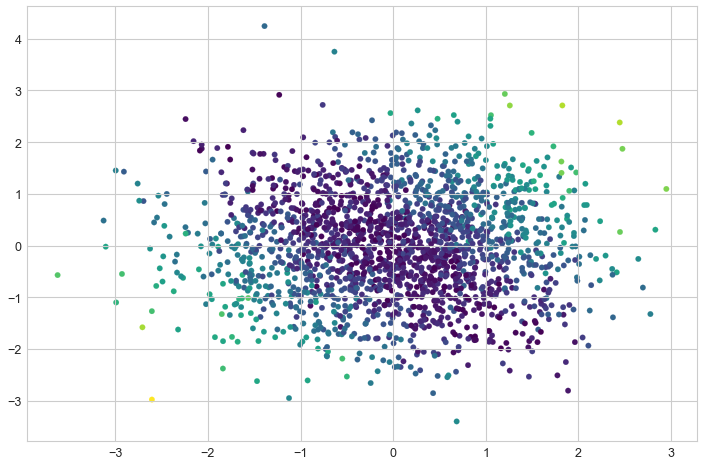

In [3]:
# Plot data
plt.scatter(x = X[:, 0], y = X[:,1], c = y)

In [4]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000)

###### Train model

In [ ]:
mlc = MultiLinearRegression(n = 10, n_iter = 10000)
mlc.fit(X_train, y_train)

 19%|██████████████▉                                                              | 1944/10000 [00:51<03:37, 36.96it/s]

In [ ]:
# Plot loss
plt.plot(mlc.loss[100:])

In [ ]:
y_pred = mlc.predict(X_test)

In [ ]:
# Plot prediction
plt.scatter(range(int(min(y_test)), int(max(y_test))), range(int(min(y_test)), int(max(y_test))))
plt.scatter(x = y_test, y = y_pred, c = y_pred)

In [ ]:
print(f"Loss: {mlc.loss[-1]}")
print(f"MSE: {sum((y_test - y_pred)**2)/len(y_test)}")

## Compare to Other Models

#### Sklearn Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
lin_r = SklearnLinearRegression()

lin_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = lin_r.predict(X_test), c = lin_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - lin_r.predict(X_test))**2)/len(y_test)}")

#### SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_r = SGDRegressor()

sgd_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = sgd_r.predict(X_test), c = sgd_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - sgd_r.predict(X_test))**2)/len(y_test)}")

#### MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor()

mlp_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = mlp_r.predict(X_test), c = mlp_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - mlp_r.predict(X_test))**2)/len(y_test)}")

#### SVM

In [ ]:
from sklearn.svm import SVR
svm_r = SVR()

svm_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = svm_r.predict(X_test), c = svm_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - svm_r.predict(X_test))**2)/len(y_test)}")

#### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_r = RandomForestRegressor()

rf_r.fit(X_train, y_train)

# Comparing predicted and expected results
plt.scatter(x = y_test, y = rf_r.predict(X_test), c = rf_r.predict(X_test))
plt.plot(range(int(min(y_test)),int(max(y_test))), range(int(min(y_test)),int(max(y_test))))

print(f"MSE: {sum((y_test - rf_r.predict(X_test))**2)/len(y_test)}")